In [1]:
# kutuphaneler tanimlandi
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv  # OpenCV kütüphanesi

%matplotlib notebook

In [2]:
# butun goruntuler yorum satiri olarak girilmistir
# test edilecek goruntu yorum satirindan cikartilip kod bastan calistirilmalidir

# -------------------------------- egitim seti --------------------------------
# data = "egitim_10.pgm"
# data = "egitim_15.pgm"
# data = "egitim_40_1.pgm"
# data = "egitim_40_2.pgm"
# data = "egitim_50_1.pgm" 
# data = "egitim_50_2.pgm"
# data = "egitim_80.pgm"

# --------------------------------- test seti -----------------------------------
# data = "test_20_1.pgm"
# data = "test_20_2.pgm"
# data = "test_30.pgm"
# data = "test_40.pgm"
data = "test_50.pgm"
# data = "test_70.pgm"
# data = "test_80_1.pgm"
# data = "test_80_2.pgm"
# data = "test_80_3.pgm"

<IPython.core.display.Javascript object>


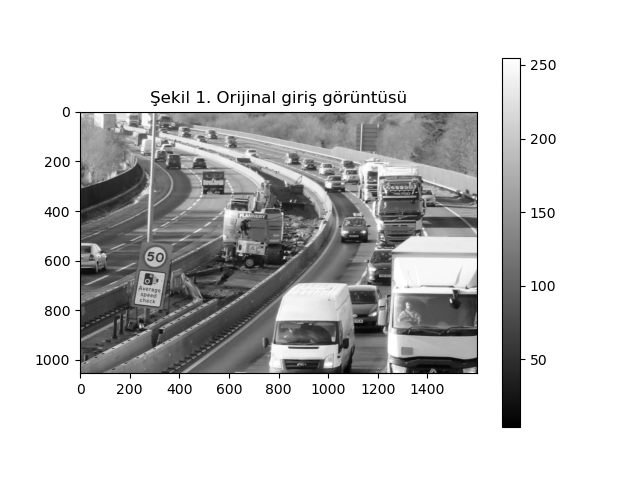

In [3]:
inputImg = cv.imread(data, 0)  # goruntu okundu

# orjinal giriş goruntusunun yazdirilmasi
plt.figure("fig.1")                            # yeni figur
plt.imshow(inputImg, cmap = "gray")            # goruntu yazdirildi
plt.title("Şekil 1. Orijinal giriş görüntüsü") # baslik eklendi
plt.colorbar()                                 # renk bari eklendi

<IPython.core.display.Javascript object>


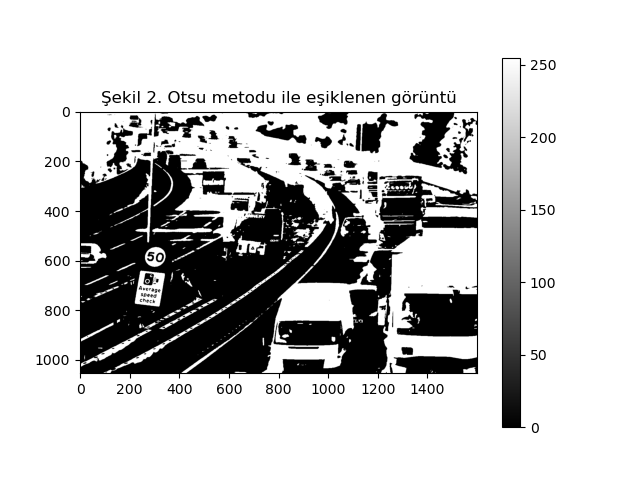

In [4]:
# goruntudeki gurultulerden kurtulmak icin bilateral filtreleme yapildi
filteredImg = cv.bilateralFilter(inputImg, 15, 20, 20)

# OTSU ile esikleme islemi
thresh, out_Otsu = cv.threshold(filteredImg, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# esiklenmis goruntu cizdirildi
plt.figure("fig.2")
plt.imshow(out_Otsu, cmap = "gray")
plt.title("Şekil 2. Otsu metodu ile eşiklenen görüntü")
plt.colorbar()

<IPython.core.display.Javascript object>


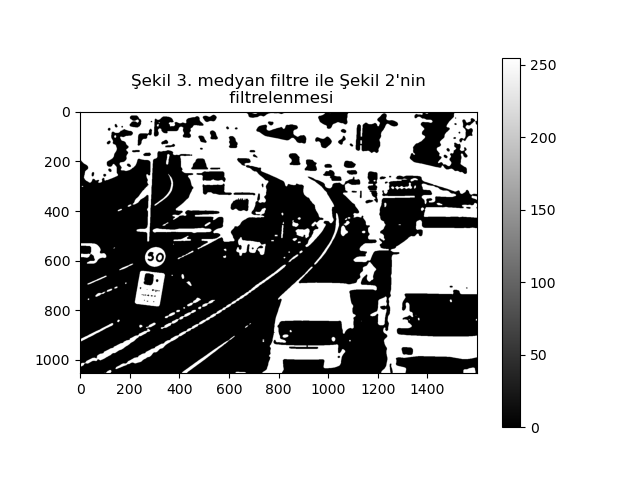

In [5]:
# medyan filtresi ile goruntu bulaniklastirildi
med_blurredImg = cv.medianBlur(out_Otsu, 11) 

# bulaniklastirilmis goruntu cizdirildi
plt.figure("fig.3")
plt.imshow(med_blurredImg, cmap = "gray")
plt.title("Şekil 3. medyan filtre ile Şekil 2'nin" "\n" " filtrelenmesi")
plt.colorbar()

<IPython.core.display.Javascript object>


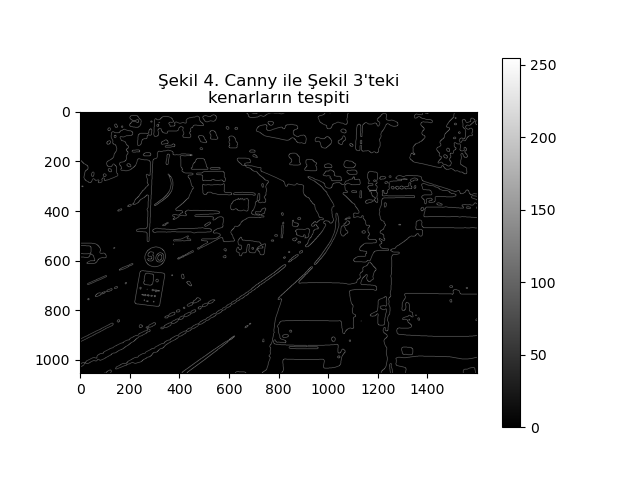

In [6]:
# canny ile kenar tespiti yapildi
edgeImg = cv.Canny(med_blurredImg, 100, 200)
# edge tespiti icin t_min = 100, t_max = 200

# kenarlari bulunan goruntunun cizdirilmesi
plt.figure("fig.4")
plt.imshow(edgeImg, cmap = "gray")
plt.title("Şekil 4. Canny ile Şekil 3'teki" "\n" "kenarların tespiti")
plt.colorbar()

<IPython.core.display.Javascript object>


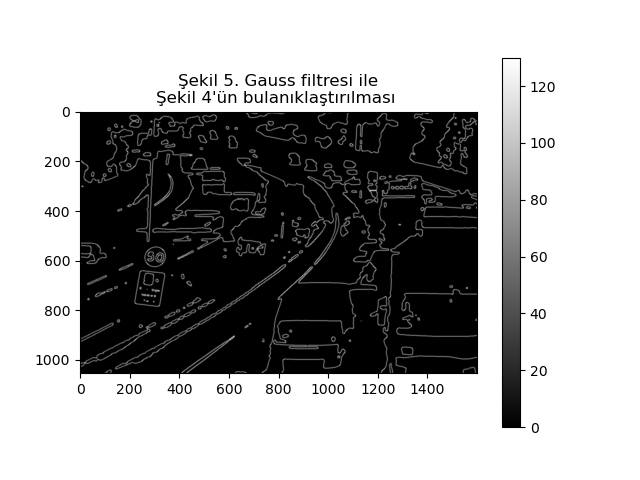

In [7]:
# goruntu gauss filtresi ile bulaniklastirildi
blurredImg = cv.GaussianBlur(edgeImg, (7, 7), 0) 

# bulaniklastirilan goruntunun cizdirilmesi
plt.figure("fig.5")
plt.imshow(blurredImg, cmap = "gray")
plt.title("Şekil 5. Gauss filtresi ile" "\n" "Şekil 4'ün bulanıklaştırılması ")
plt.colorbar()

<IPython.core.display.Javascript object>


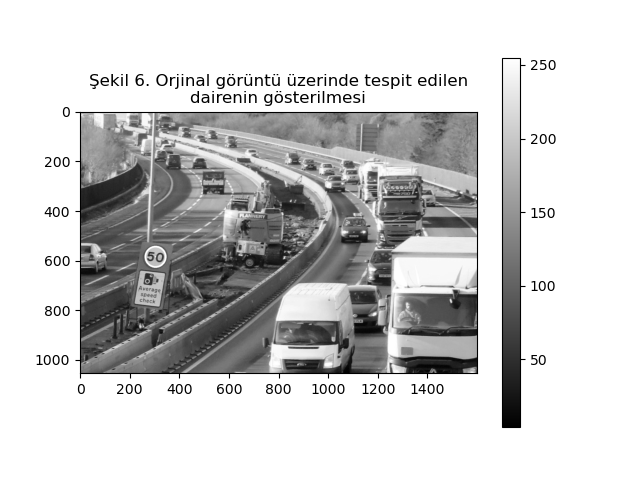

In [8]:
# daire tespiti
rows = blurredImg.shape[0] # goruntunun satir bilgisi alindi

detectedImg = inputImg.copy() # tespit edilen isareti giris goruntusu uzerinde gosterebilmek icin yeni goruntu

# blurredImg goruntusunde daire aranacak
circles = cv.HoughCircles(blurredImg, cv.HOUGH_GRADIENT, 1, rows/16, param1=100, param2=100, minRadius=30, maxRadius=300)
# tespit edilen cemberler arasi mesafe minimum satir/16 olacak sekilde ayarlandi
# canny ust esik degeri: 100 
# merkez tespiti icin esik degeri: 100
# dairenin minimum yaricapi 30, maksimum yaricapi 300 olacak sekilde ayarlandi

# eger daire tespit edildiyse
if circles is not None:
    circles = np.uint16(np.around(circles)) # yaricap ve merkez koordinat bilgileri tam sayiya cevrildi
    for i in circles[0, :]: 
        center = (i[0], i[1]) # dairenin merkez noktasinin degerleri
        cv.circle(detectedImg, center, 1, (255), 2)      # tespit edilen dairenin merkezi cizdirildi
        radius = i[2] # yaricapinin degeri
        cv.circle(detectedImg, center, radius, (255), 6) # tespit edilen daire cizdirildi

# tespit edilen daire cizdirildi
plt.figure("fig.6")
plt.imshow(detectedImg, cmap = "gray")
plt.title("Şekil 6. Orjinal görüntü üzerinde tespit edilen" "\n" "dairenin gösterilmesi")
plt.colorbar()

<IPython.core.display.Javascript object>


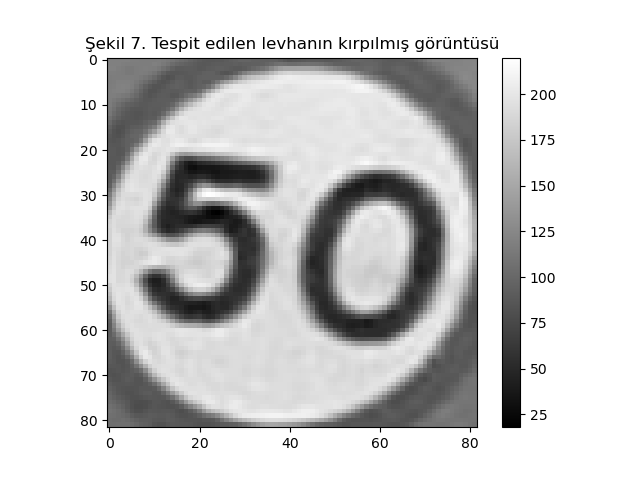

In [9]:
# diger objelerle ilgilenilmedigi icin tespit edilen daire kirpildi
# img[start_row:end_row, start_col:end_col]
croppedImg = inputImg[(center[1]-radius):(center[1]+radius), (center[0]-radius):(center[0]+radius)]  

# center[0] - x ekseni (sutunlar)
# center[1] - y ekseni (satirlar)

# kirpilan daire cizdirildi
plt.figure("fig.7")
plt.imshow(croppedImg, cmap = "gray")
plt.title("Şekil 7. Tespit edilen levhanın kırpılmış görüntüsü")
plt.colorbar()

<IPython.core.display.Javascript object>


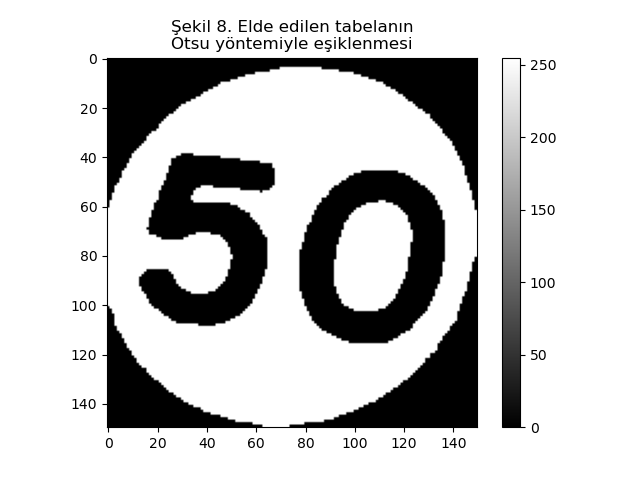

In [10]:
size = (150, 150) # yeni goruntunun boyu tanimlandi

# bicubic interpolasyon kullanilarak goruntu yeniden olceklendi
resizedImg = cv.resize(croppedImg, size, interpolation = cv.INTER_CUBIC) 

# OTSU ile esikleme islemi
t, thresImg = cv.threshold(resizedImg, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# esiklenen goruntu cizdirildi
plt.figure("fig.8") 
plt.imshow(thresImg, cmap = "gray")
plt.title("Şekil 8. Elde edilen tabelanın" "\n" "Otsu yöntemiyle eşiklenmesi")
plt.colorbar()

<IPython.core.display.Javascript object>


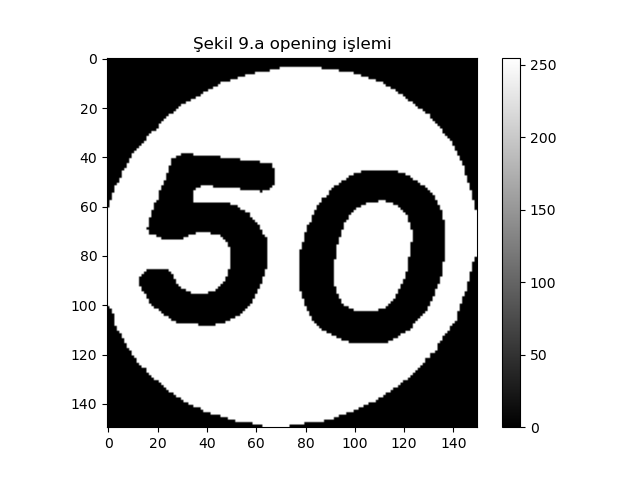

<IPython.core.display.Javascript object>


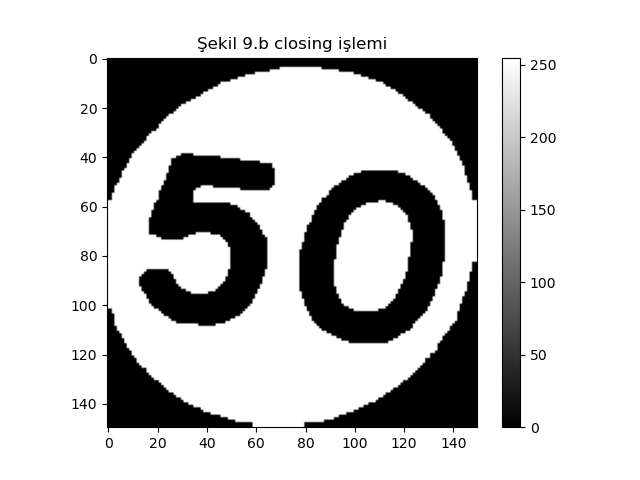

In [11]:
# goruntudeki olasi gurultuleri engellemek icin
filterSize = (3, 3)                                          # structuring elemaninin boyu
kernel = cv.getStructuringElement(cv.MORPH_RECT, filterSize) # kare structuring elemani olusturuldu

opening = cv.morphologyEx(thresImg, cv.MORPH_OPEN, kernel)   # opening islemi yapildi

# goruntu cizdirildi
plt.figure("fig.9 a")
plt.imshow(opening, cmap = "gray")
plt.title("Şekil 9.a opening işlemi")
plt.colorbar()


# goruntudeki olasi bosluklari doldurmak icin 
# opening isleminde kullanilan structuring elemani kullanildi
closing = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)   # closing islemi yapildi

# goruntu cizdirildi
plt.figure("fig.9 b")
plt.imshow(closing, cmap = "gray")
plt.title("Şekil 9.b closing işlemi")
plt.colorbar()

### Levhadaki sayıyı okuma

Projeye ek olarak EasyOCR kütüphanesi kullanılarak tespit edilen levhalardaki hız sınırı, kodlar yorum satırından çıkartılarak okunabilir. Projedeki asıl amaç yazıların okunması olmayıp levhaların tespiti olduğu için ve kütüphanenin kurulumu kodu yavaşlattığı için bu kısım yorum satırında bırakılmıştır.

In [12]:
# # kutuphanenin kurulmasi
# !pip install easyocr
# # kutuphanenin tanimlanmasi
# import easyocr

In [13]:
# reader = easyocr.Reader(['en'])
# # fig.7 icin
# result_fig7 = reader.readtext(croppedImg) 
# speed_fig7 = result_fig7[0][-2]
# print("Hız limiti (fig.7):",speed_fig7)

# # fig.9.b icin
# result_fig9_b = reader.readtext(closing)
# speed_fig9_b = result_fig9_b[0][-2] # okunan yazi sondan ikinci elemanda bulunmakta
# print("Hız limiti (fig.9 b):",speed_fig9_b)